In [1]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [4]:
from gensim.models.phrases import Phrases, Phraser

In [2]:
df = pd.read_csv('nlp_professional.csv')

In [3]:
df_clean = df[['Lemmas']]

In [5]:
df_clean['Lemmas'] = df_clean.Lemmas.astype(str)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_clean["Lemmas"] = df_clean['Lemmas'].str.replace('[^\w\s]','')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
sent = [row.split() for row in df_clean['Lemmas']]

In [8]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 17:01:10: collecting all words and their counts
INFO - 17:01:10: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 17:01:12: PROGRESS: at sentence #10000, processed 610582 words and 322421 word types
INFO - 17:01:13: PROGRESS: at sentence #20000, processed 1223927 words and 558499 word types
INFO - 17:01:21: collected 2168958 word types from a corpus of 4656995 words (unigram + bigrams) and 27981 sentences
INFO - 17:01:21: using 2168958 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [9]:
bigram = Phraser(phrases)

INFO - 17:01:33: source_vocab length 2168958
INFO - 17:02:01: Phraser built with 2523 phrasegrams


In [11]:
sentences = bigram[sent]

In [12]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

182754

In [13]:
import multiprocessing

from gensim.models import Word2Vec

In [14]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [15]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [16]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 17:04:06: collecting all words and their counts
INFO - 17:04:06: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:04:10: PROGRESS: at sentence #20000, processed 1120366 words, keeping 29262 word types
INFO - 17:04:22: collected 182754 word types from a corpus of 4280663 raw words and 27981 sentences
INFO - 17:04:22: Loading a fresh vocabulary
INFO - 17:04:22: effective_min_count=20 retains 13252 unique words (7% of original 182754, drops 169502)
INFO - 17:04:22: effective_min_count=20 leaves 3920704 word corpus (91% of original 4280663, drops 359959)
INFO - 17:04:22: deleting the raw counts dictionary of 182754 items
INFO - 17:04:22: sample=6e-05 downsamples 1167 most-common words
INFO - 17:04:22: downsampling leaves estimated 2279468 word corpus (58.1% of prior 3920704)
INFO - 17:04:22: estimated required memory for 13252 words and 300 dimensions: 38430800 bytes
INFO - 17:04:22: resetting layer weights


Time to build vocab: 0.27 mins


In [25]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

WARNING - 17:12:31: Effective 'alpha' higher than previous training cycles
INFO - 17:12:31: training model with 7 workers on 13252 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 17:12:32: EPOCH 1 - PROGRESS: at 15.37% examples, 117096 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:33: EPOCH 1 - PROGRESS: at 30.19% examples, 122521 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:34: EPOCH 1 - PROGRESS: at 46.53% examples, 123264 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:35: EPOCH 1 - PROGRESS: at 62.54% examples, 123887 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:36: EPOCH 1 - PROGRESS: at 77.33% examples, 123040 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:37: EPOCH 1 - PROGRESS: at 79.70% examples, 124161 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:38: EPOCH 1 - PROGRESS: at 81.43% examples, 125056 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:39: EPOCH 1 - PROGRESS: at 83.06% examples, 125418 words/s, in_qsize 0, out_qsize 0
INFO - 17:12:4

Time to train the model: 8.82 mins


In [33]:
w2v_model.save("word2vec.model")

INFO - 17:46:09: saving Word2Vec object under word2vec.model, separately None
INFO - 17:46:09: not storing attribute vectors_norm
INFO - 17:46:09: not storing attribute cum_table
INFO - 17:46:10: saved word2vec.model


In [26]:
w2v_model.init_sims(replace=True)

INFO - 17:21:55: precomputing L2-norms of word weight vectors


In [38]:
w2v_model.wv.most_similar(positive=["catering"])

INFO - 19:08:03: precomputing L2-norms of word weight vectors


[('food', 0.42593449354171753),
 ('meal', 0.41121989488601685),
 ('quality_quantity', 0.4058028757572174),
 ('quality', 0.3818317651748657),
 ('portion_size', 0.37765538692474365),
 ('service', 0.376914918422699),
 ('DoCo', 0.3439851999282837),
 ('quantity', 0.3424699902534485),
 ('snack', 0.34201738238334656),
 ('good', 0.3334057927131653)]

In [ ]:
# From here, we are going to make the dashboard

In [30]:
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

In [10]:
# Read the model
w2v_model = Word2Vec.load("word2vec.model")

In [21]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [27]:
#tsnescatterplot(w2v_model, 'seat', ['food'])

In [55]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['seat','food','entertainment','staff','money']}
similar_words

{'seat': ['row', 'window_seat', 'legroom', 'seating', 'recline'],
 'food': ['meal', 'food_drink', 'snack', 'selection', 'good'],
 'entertainment': ['inflight_entertainment',
  'entertainment_system',
  'IFE',
  'AVOD',
  'movie'],
 'staff': ['ground_staff', 'agent', 'attendant', 'employee', 'staff_member'],
 'money': ['extra_money', 'pay', 'aggravation', 'waste_money', 'cash']}

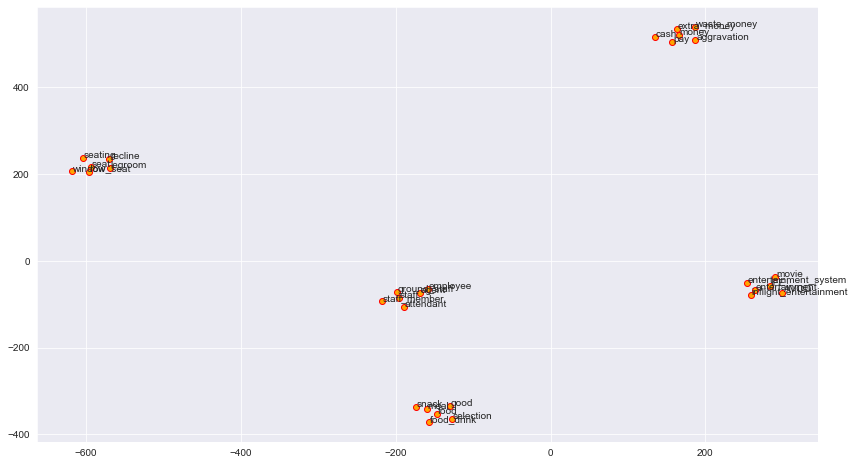

In [24]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [72]:
# Apply TSNE
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
words

# Make the df for visualization
df = pd.DataFrame({'Word':words, 
                   'X':T[:,0], 
                   'Y':T[:,1], 
                   'Origin':[x for x in list(similar_words.keys()) for _ in range(6)]})
fig.update_layout(showlegend=True)

In [67]:
fig = px.scatter(df, x='X', y='Y', color='Origin', text='Word')
fig.update_traces(textposition='top center')

In [73]:
'seat'

'seat'